# LE-SDE Data Analysis

In [1]:
import os, sys

print('Importing dataset...')

from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/My Drive/Tryout LocalElasticity and Overparameterization with Neurashed")

Importing dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd le_sde

/content/drive/My Drive/Tryout LocalElasticity and Overparameterization with Neurashed/le_sde


In [3]:
!pip install -r requirements.txt

In [4]:
from __future__ import print_function, absolute_import, division

%load_ext autoreload
%autoreload 2
import sys, os, json, requests, time, datetime, logging, multiprocessing
from pathlib import Path
import pandas as pd
import numpy as np
import functools

import warnings
warnings.filterwarnings('ignore')

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rc

sns.set()
sns.set_style({'font.family': 'Times New Roman'})
sns.set_palette('deep')
sns.set_style("white")

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# if encounter matplotlib error, try disabling tex
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)



# Load Experiment Results

In [6]:
import src.data_analyzer as da
import src.plotter as plotter
import src.data_analyzer as data_analyzer
# path to the csv files
EXP_DIR = Path('./exp_data')

In [7]:
exp_cifar10_K = da.load_cifar10_K(EXP_DIR)

In [8]:
exp_cifar10_K.hists.head()

,trial,itr,smp,y,y_logit0,y_logit1,tr_loss,val_loss,val_acc,K,y_logit2,y_logit3
0,0,0,1028,0,0.007188,0.095219,0.738131,0.693789,0.5,2,NaN,NaN
1,0,1,1253,0,0.000306,0.093520,0.740840,0.693755,0.5,2,NaN,NaN
2,0,2,2600,1,-0.004972,0.094248,0.644767,0.693784,0.5,2,NaN,NaN
3,0,3,2099,1,-0.002750,0.102419,0.641945,0.693814,0.5,2,NaN,NaN
4,0,4,103,0,0.009243,0.104029,0.741663,0.693774,0.5,2,NaN,NaN


## Figure 1: Separation of Logits in Neural Nets

In [9]:
def get_proj_vec(Xbar, v1=0, v2=1, n_avg=2):
    """
    Xbar: n_itr * n_class * n_logits
    """
    proj_vec = np.mean(Xbar[-n_avg:,v1,:] - Xbar[-n_avg:,v2,:], axis=0)
    return proj_vec / np.linalg.norm(proj_vec)

#### CIFAR-10 in $\mathbb{R}^3$

In [10]:
pip install latex

  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7604 sha256=8fa85cf3e311aac9b6d4d3fad244ce3ea85a576520fcf48a39b3ad8a4c9069e0
  Stored in directory: /root/.cache/pip/wheels/57/d6/11/5d5718227890d9e479b6137cb406410c37a0b84b2ab35b872b
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7247 sha256=595842dce9da340573b6073b6d47c565527e3c6c929e8f544b8b5e8fcc598255
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2781 sha256=136a9320230fa021a709b634800e207862e7b8e7a28f545b7082d5539f0c63c7
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2214 sha256=c62d6a57d929a49c5a71cc62e6a0627023efa630f79f3d5320b420cc4c36c740
  Stored in directory: /root/.cache/pip/wheels/7a/f1/d7/124b54c21a9ba4973bc60fc

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# resetting matplotlib settings

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


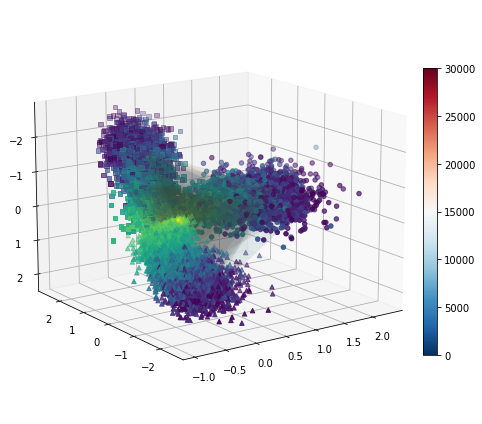

In [13]:
plotter.viz_sep_3d(exp_cifar10_K, "K=='3'", view=(15, 235), zinv=True, filename=None)

#### CIFAR-10 in $\mathbb{R}$

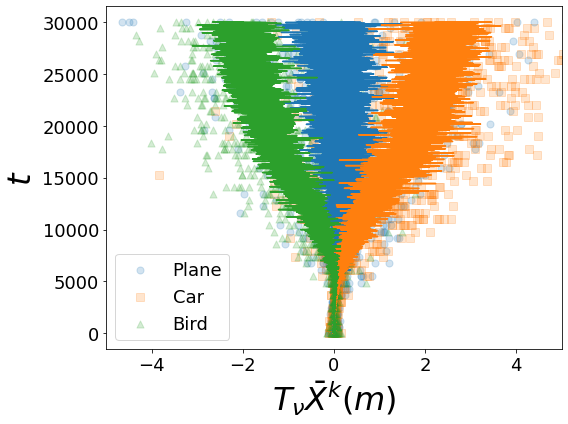

In [14]:
plotter.viz_sep_1d(exp_cifar10_K, "K=='3'", lambda Xbar: get_proj_vec(Xbar, 1, 2), xlim=(-5, 5), filename=None)

## Figure 3: Estimated $\hat{A}(t)$, $\hat{B}(t)$, $\hat{\alpha}(t)$, $\hat{\beta}(t)$

In [15]:
from src.data_analyzer import savgol_diff

### Figure 3 (c)-(d), (g)-(h): CIFAR-10

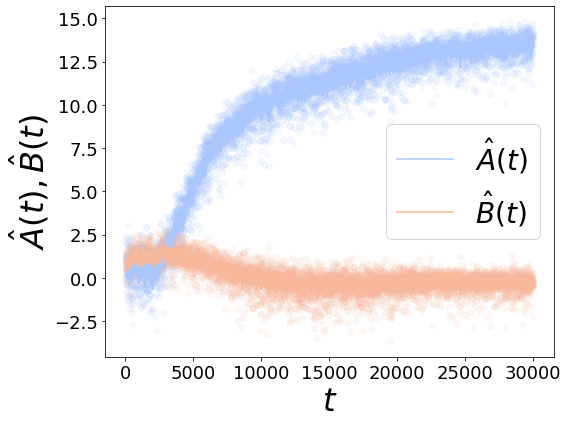

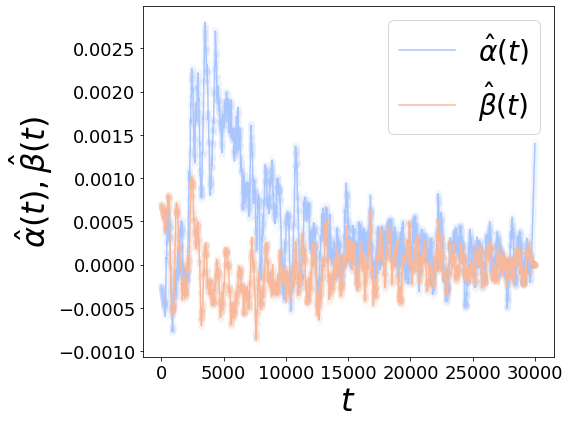

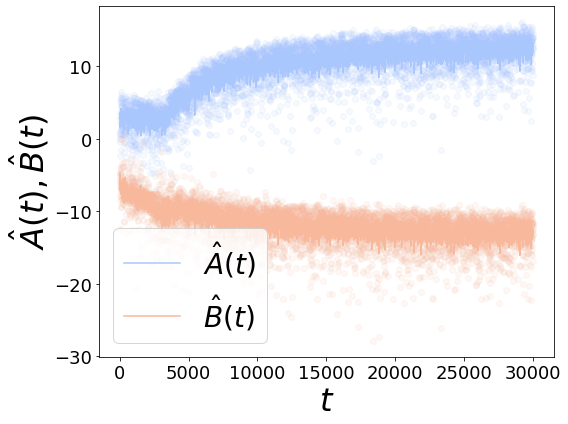

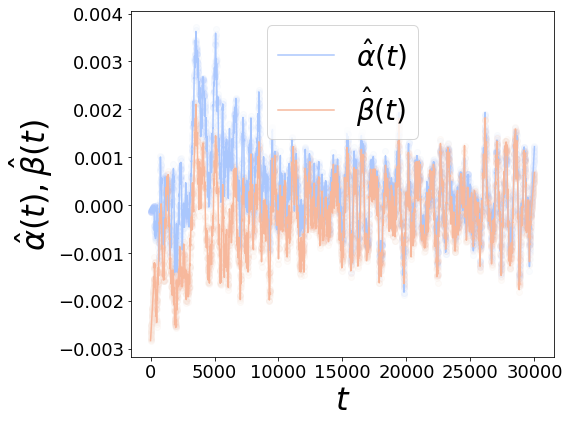

In [16]:
plotter.viz_AB(exp_cifar10_K, "K=='3'", est_model='I', filename=None)
plotter.viz_ab(exp_cifar10_K, "K=='3'", est_model='I', diff_handle=lambda x : savgol_diff(x, 551), filename=None)
plotter.viz_AB(exp_cifar10_K, "K=='3'", est_model='L', filename=None)
plotter.viz_ab(exp_cifar10_K, "K=='3'", est_model='L', diff_handle=lambda x : savgol_diff(x, 551), filename=None)